# Análise de distribuição dos dados e Variogramas
---

In [1]:
import pandas as pd 
import numpy as np
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import skgstat as skg
from skgstat import models
from scipy.optimize import curve_fit

### Variogramas
---

In [3]:
df_cidades = pd.read_csv('data/dados_hist_clima_concatenados/INMET_S_PR_MEDIA_OUTUBRO_01-01-2006_A_30-11-2021.CSV', index_col=[0])

Text(0.5, 1.0, 'Distribuição de Frequências')

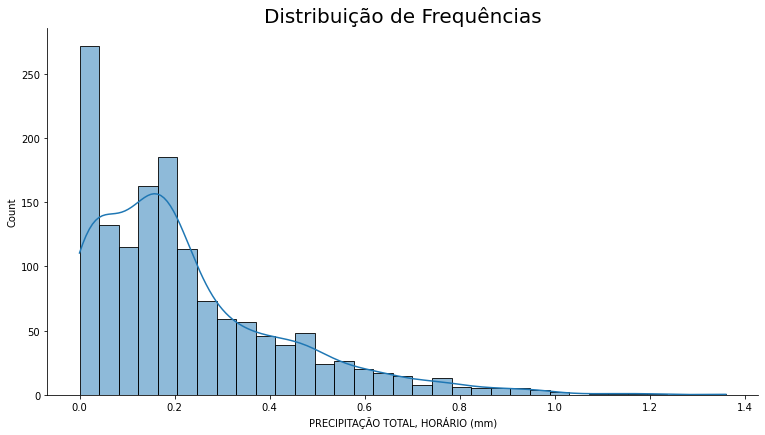

In [4]:
ax = sns.displot(df_cidades['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], kde=True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequências')

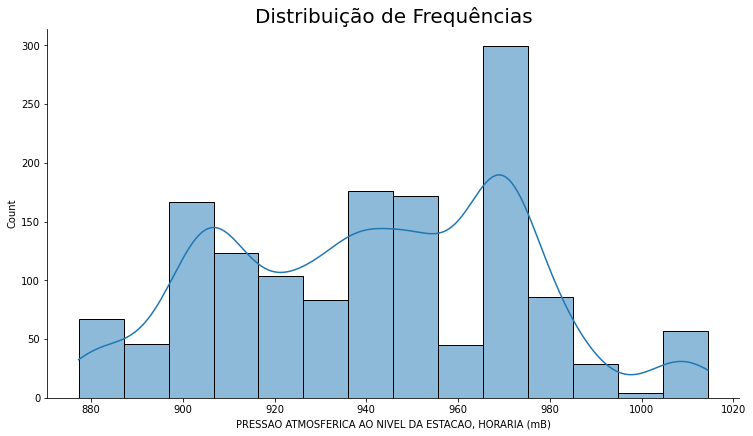

In [5]:
ax = sns.displot(df_cidades['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'], kde=True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequências')

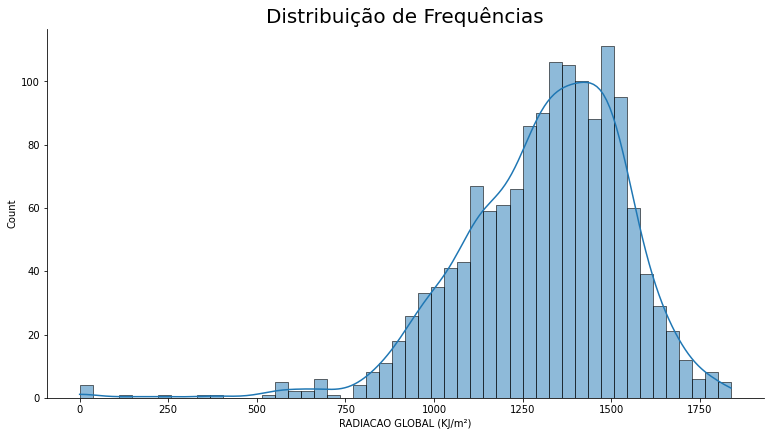

In [6]:
ax = sns.displot(df_cidades['RADIACAO GLOBAL (KJ/m²)'], kde=True, bins=50)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequências')

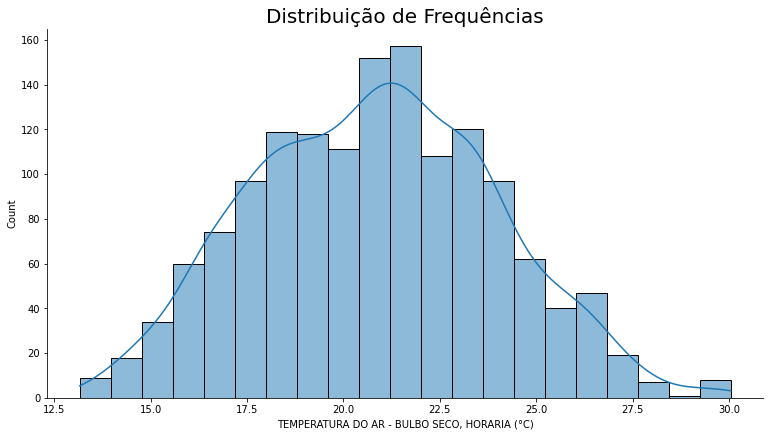

In [7]:
ax = sns.displot(df_cidades['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], kde=True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequências')

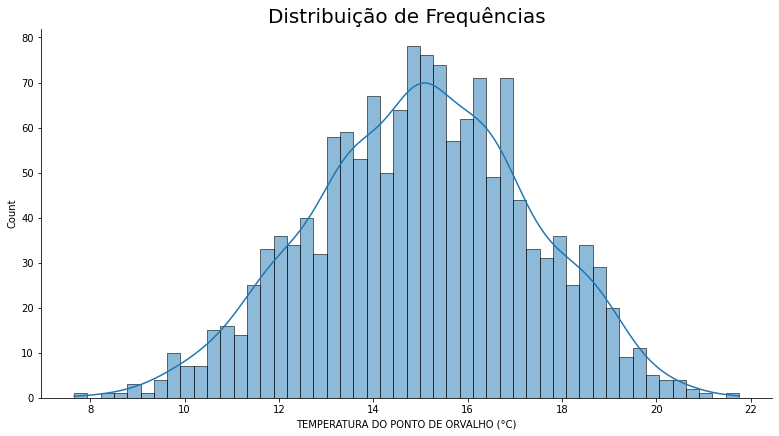

In [8]:
ax = sns.displot(df_cidades['TEMPERATURA DO PONTO DE ORVALHO (°C)'], kde=True, bins=50)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequências')

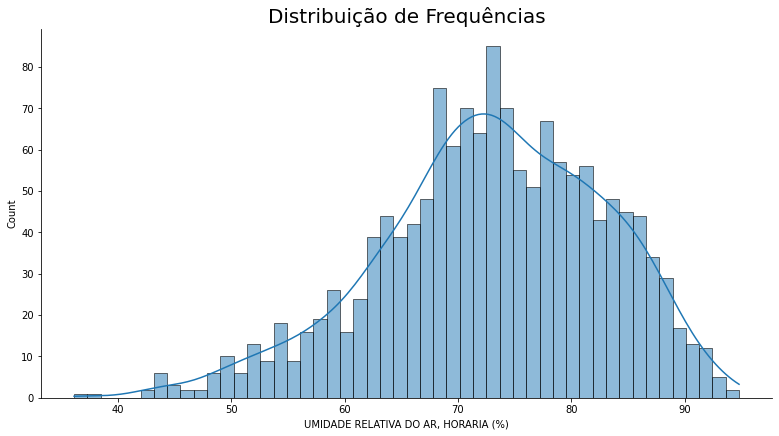

In [9]:
ax = sns.displot(df_cidades['UMIDADE RELATIVA DO AR, HORARIA (%)'], kde=True, bins=50)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

Text(0.5, 1.0, 'Distribuição de Frequências')

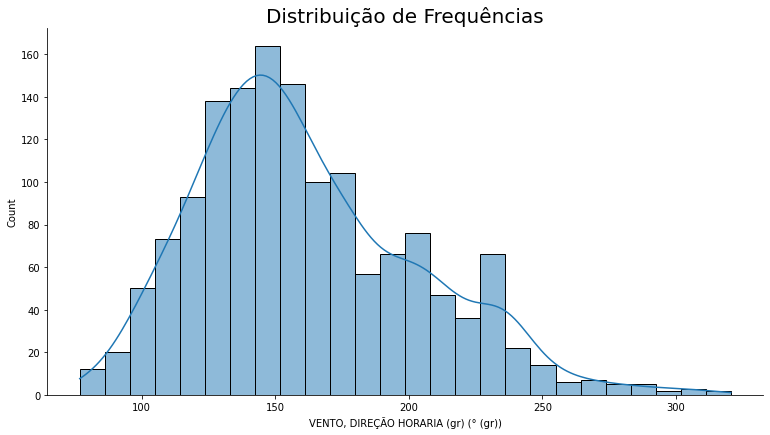

In [10]:
ax = sns.displot(df_cidades['VENTO, DIREÇÃO HORARIA (gr) (° (gr))'], kde=True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de Frequências', fontsize=20)

In [11]:
coords = df_cidades[['LATITUDE','LONGITUDE']].to_numpy()
values = df_cidades['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].to_numpy()

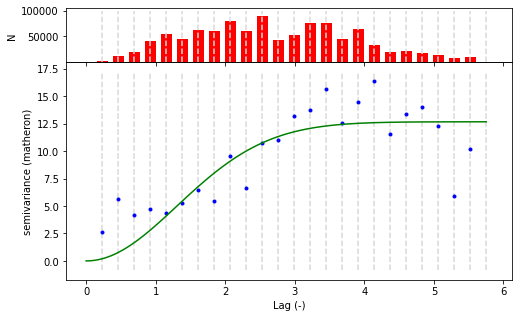

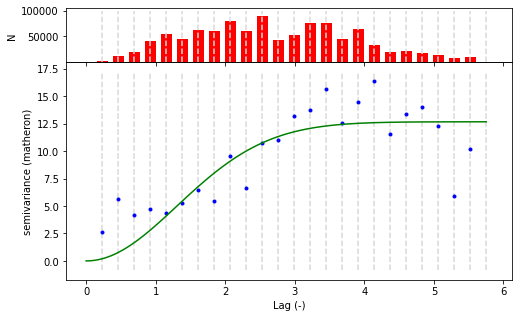

In [12]:
Vg = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=100, model='gaussian', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even' )
Vg.plot()

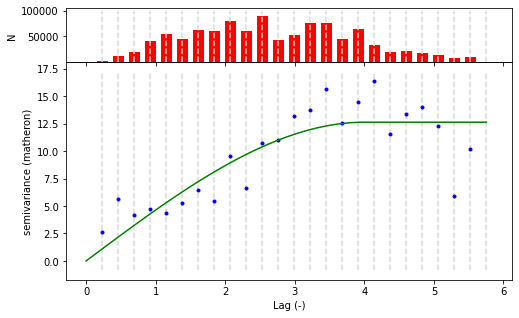

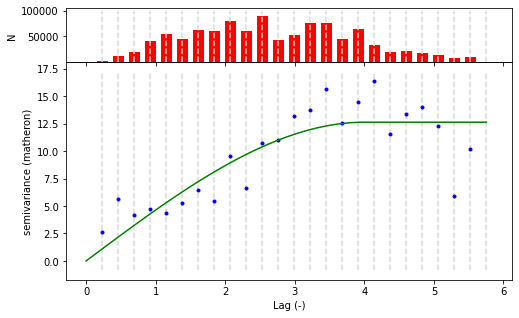

In [13]:
Vs = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=500, model='spherical', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even')
Vs.plot()

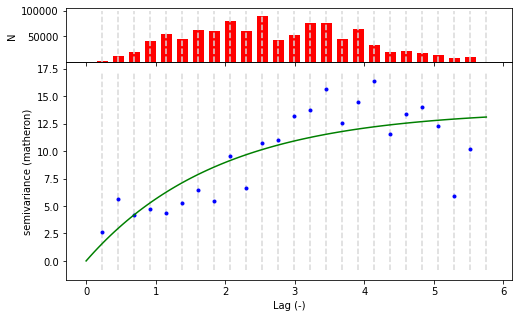

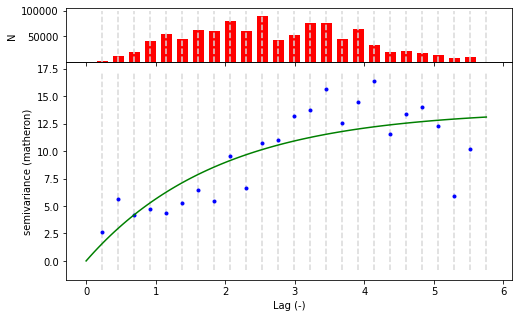

In [14]:
Vg = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=100, model='exponential', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even' )
Vg.plot()

In [15]:
def esferico(coords, values):
    
    # Instânciando variograma
    Vs = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=500, model='spherical', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even')
    # Plot da semivariância
    Vs.plot();
    
    xdata_s = Vs.bins
    ydata_s = Vs.experimental
    ydata_s = np.nan_to_num(ydata_s)

    # initial guess - otherwise lm will not find a range
    p0 = [np.mean(xdata_s), np.mean(ydata_s), 0]
    cof, cov =curve_fit(models.spherical, xdata_s, ydata_s, p0=p0)
    
    # Coeficientes encontrados para ajustar o modelo aos dados
    print('Coeficientes encontrados para ajustar o modelo aos dados:')
    print("range: %.2f   sill: %.f   nugget: %.2f" % (cof[0], cof[1], cof[2]))
    
    xi_s = np.linspace(xdata_s[0], xdata_s[-1], 100)
    yi_s = [models.spherical(h, *cof) for h in xi_s]
    
    rmse_s = Vs.rmse
    r_s = Vs.describe().get('effective_range')
    print('\nSpherical   RMSE: %.2f' % rmse_s)
    print('Spherical effective range:    %.1f' % r_s)
    
    return xdata_s, ydata_s, xi_s, yi_s, Vs

In [16]:
def gaussiano(coords, values):
    
    # Instânciando variograma
    Vg = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=100, model='gaussian', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even' )
    
    # Plot da semivariância
    Vg.plot();
    
    xdata_g = Vg.bins
    ydata_g = Vg.experimental
    ydata_g = np.nan_to_num(ydata_g)

    # initial guess - otherwise lm will not find a range
    p0 = [np.mean(xdata_g), np.mean(ydata_g), 0]
    cof, cov =curve_fit(models.gaussian, xdata_g, ydata_g, p0=p0)
    
    # Coeficientes encontrados para ajustar o modelo aos dados
    print('Coeficientes encontrados para ajustar o modelo aos dados:')
    print("range: %.2f   sill: %.f   nugget: %.2f" % (cof[0], cof[1], cof[2]))
    
    xi_g =np.linspace(xdata_g[0], xdata_g[-1], 100)
    yi_g = [models.gaussian(h, *cof) for h in xi_g]
    
    rmse_ga = Vg.rmse
    r_ga = Vg.describe().get('effective_range')
    print('\nGaussian   RMSE: %.2f' % rmse_ga)
    print('Gaussian effective range:    %.1f' % r_ga)
    
    return xdata_g, ydata_g, xi_g, yi_g, Vg

In [17]:
def exponencial(coords, values):
    
    # Instânciando variograma
    Ve = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=500, model='exponential', fit_method='trf',
                       estimator='matheron', dist_func='euclidean', bin_func='even')
    # Plot da semivariância
    Ve.plot();
    
    xdata_e = Ve.bins
    ydata_e = Ve.experimental
    ydata_e = np.nan_to_num(ydata_e)

    # initial guess - otherwise lm will not find a range
    p0 = [np.mean(xdata_e), np.mean(ydata_e), 0]
    cof, cov =curve_fit(models.exponential, xdata_e, ydata_e, p0=p0)
    
    # Coeficientes encontrados para ajustar o modelo aos dados
    print('Coeficientes encontrados para ajustar o modelo aos dados:')
    print("range: %.2f   sill: %.f   nugget: %.2f" % (cof[0], cof[1], cof[2]))
    
    xi_e =np.linspace(xdata_e[0], xdata_e[-1], 100)
    yi_e = [models.exponential(h, *cof) for h in xi_e]

    rmse_e = Ve.rmse
    r_e = Ve.describe().get('effective_range')
    print('\nExponential   RMSE: %.2f' % rmse_e)
    print('Exponential effective range:    %.1f' % r_e)
    
    return xdata_e, ydata_e, xi_e, yi_e, Ve

Coeficientes encontrados para ajustar o modelo aos dados:
range: 3.83   sill: 10   nugget: 1.21

Spherical   RMSE: 2.23
Spherical effective range:    4.0


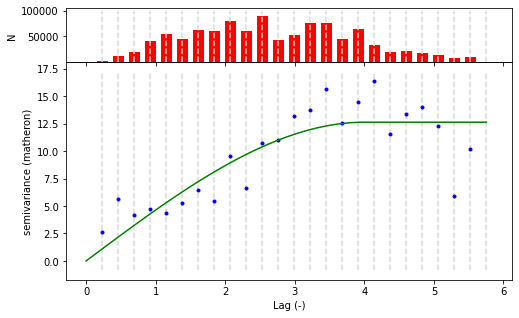

In [18]:
xdata_s, ydata_s, xi_s, yi_s, Vs = esferico(coords, values)

Coeficientes encontrados para ajustar o modelo aos dados:
range: 3.85   sill: 9   nugget: 2.74

Gaussian   RMSE: 2.43
Gaussian effective range:    3.7


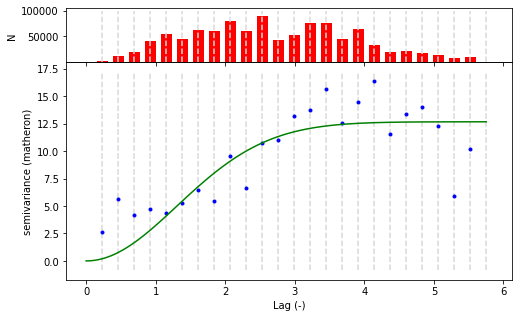

In [19]:
xdata_g, ydata_g, xi_g, yi_g, Vg = gaussiano(coords, values)

Coeficientes encontrados para ajustar o modelo aos dados:
range: 4.14   sill: 12   nugget: -0.19

Exponential   RMSE: 2.45
Exponential effective range:    5.7


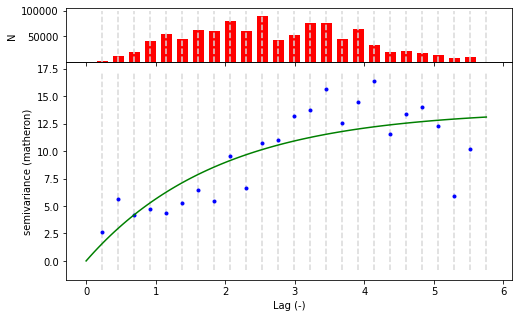

In [20]:
xdata_e, ydata_e, xi_e, yi_e, Ve = exponencial(coords, values)

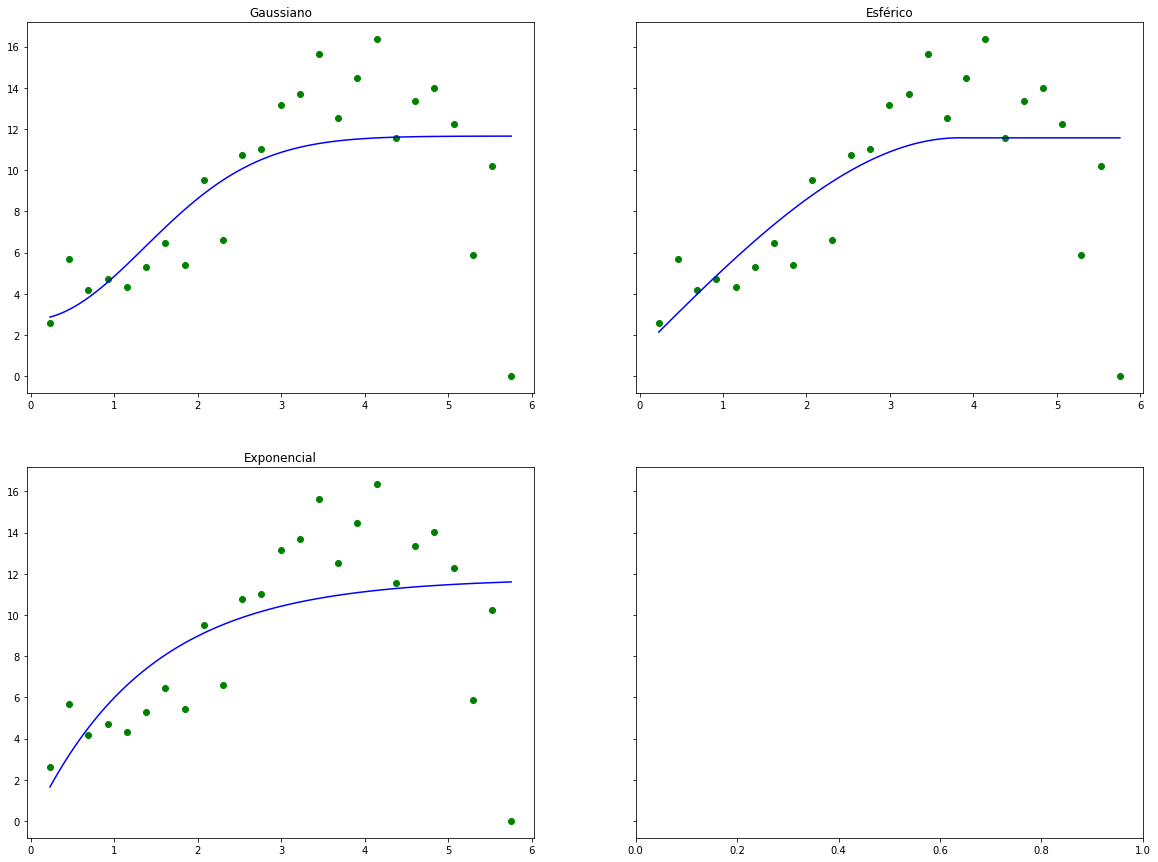

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharey=True)

axs[0, 0].set_title('Gaussiano')
axs[0, 0].plot(xdata_g, ydata_g, 'og')
axs[0, 0].plot(xi_g, yi_g, '-b');

axs[0, 1].set_title('Esférico')
axs[0, 1].plot(xdata_s, ydata_s, 'og')
axs[0, 1].plot(xi_s, yi_s, '-b');

axs[1, 0].set_title('Exponencial')
axs[1, 0].plot(xdata_e, ydata_e, 'og')
axs[1, 0].plot(xi_e, yi_e, '-b');

Escolheremos aquele modelo que a curva tem uma subida mais definida com uma certa estabilização da reta logo em seguida.

In [22]:
df_cidades['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].describe()

count    1458.000000
mean       21.469623
std         3.170675
min        13.600000
25%        19.062500
50%        21.485000
75%        23.787500
max        30.860000
Name: TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C), dtype: float64

In [23]:
df_cidades.shape

(1458, 20)